In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv('/content/cricket_values.csv',usecols=[0,1,2])
df.columns=['Class','Pitch','Values']

In [29]:
df

,Class,Pitch,Values
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


<Axes: xlabel='Pitch', ylabel='Density'>

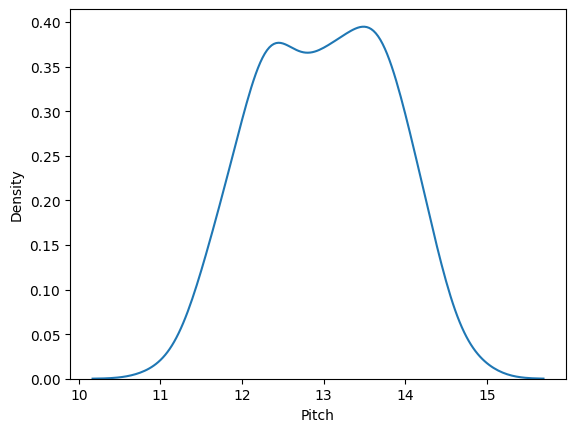

In [30]:
sns.kdeplot(df['Pitch'])

<Axes: xlabel='Values', ylabel='Density'>

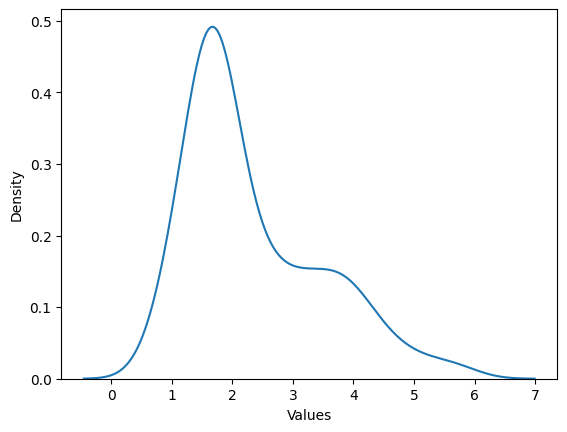

In [31]:
sns.kdeplot(df['Values'])

<Axes: xlabel='Pitch', ylabel='Values'>

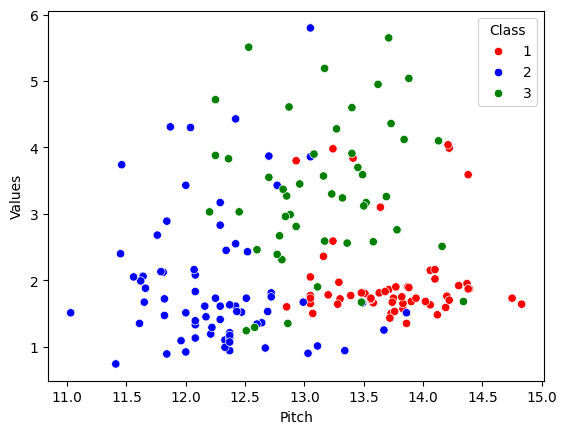

In [32]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(data=df,x='Pitch',y='Values',hue='Class',palette=color_dict)



In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class',axis=1),df['Class'],test_size=0.3,random_state=0)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

X_train_scaler=scaler.transform(X_train)
X_test_scaler=scaler.transform(X_test)


In [35]:
X_train_scaler=pd.DataFrame(X_train_scaler,columns=X_train.columns)
X_test_scaler=pd.DataFrame(X_test_scaler,columns=X_test.columns)

In [37]:
np.round(X_train.describe(),1)

,Pitch,Values
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


<Axes: xlabel='Pitch', ylabel='Density'>

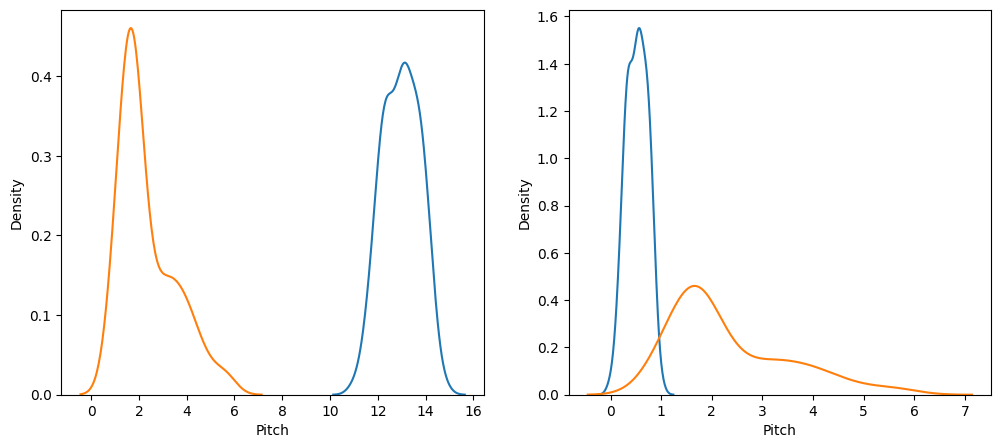

In [40]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train['Pitch'],ax=ax1)
sns.kdeplot(X_train['Values'],ax=ax1)

sns.kdeplot(X_train_scaler['Pitch'],ax=ax2)
sns.kdeplot(X_train['Values'],ax=ax2)

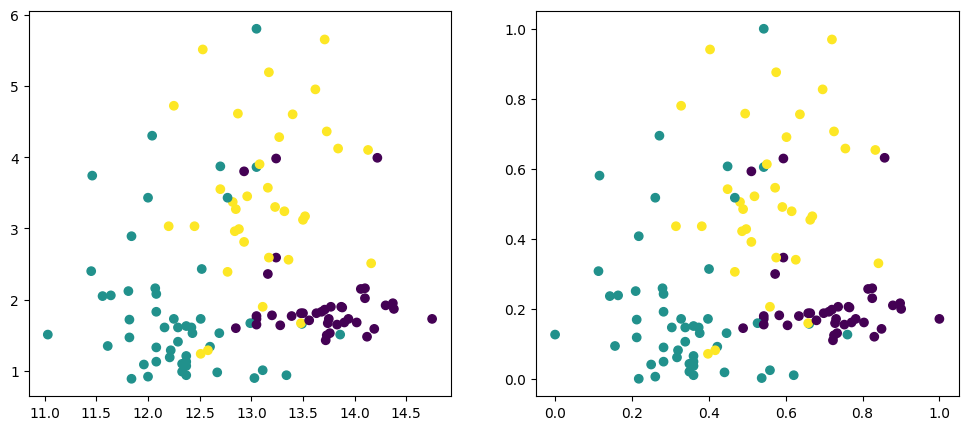

In [41]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Pitch'],X_train['Values'],c=y_train)

ax2.scatter(X_train_scaler['Pitch'],X_train_scaler['Values'],c=y_train)
plt.show()